<a href="https://colab.research.google.com/github/Patisson4/ML/blob/lab-1/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Перед началом выполнения, сделайте копию этого colab'а. Чтобы сделать копию нужно в пункте меню Файл выбрать "Сохранить копию на диске"

In [12]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [13]:
def linan(n):
    if not isinstance(n, int) or n < 1:
        raise ArithmeticError("Dimensions must be a non-negative integer")

    A = np.zeros([n, n])
    B = np.zeros(n)

    for i in range(n):
        arguments = list(map(int, input("Enter coefficients: ").split(' ')))
        A[i] = arguments[:-1]
        B[i] = arguments[-1]

    return np.linalg.solve(A, B)


print(linan(2))

[-1.  2.]


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```

In [14]:
def borders(n):
    if not isinstance(n, int) or n < 1:
        raise ArithmeticError("dimensions must be a non-negative integer")

    result = np.zeros([n, n])

    result[:, 0] = 1
    result[:, -1] = 1
    result[0, :] = 1
    result[-1, :] = 1

    return result


print(borders(int(input("Enter dimensions: "))))

[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [39]:
def f(a, b):
    return lambda x: (x + a) ** 2 - b


def g(a, b):
    return lambda x: np.abs(f(a, b)(x))


a, b = map(int, input("Enter parameters").split(" "))
f_x = opt.minimize(f(a, b), np.zeros(1)).x[0]
g_x = np.asarray([opt.minimize(g(a, b), np.zeros(1)).x[0]])

if b > 0:

    g_x = np.sort(np.append(g_x, -2 * a - g_x[0]))
    # if g_x > -a:
    #     g_x_2 = (-a - (g_x - a))
    # else:
    #     g_x_2 = (-a + (-a - g_x))
print(np.round(f_x), np.round(g_x))

-3.0 [-5. -1.]


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

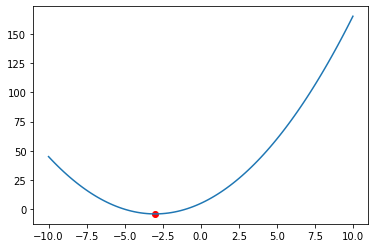

In [40]:
def min_f_graph():
    x = np.linspace(-10, 10, 100)
    y = list(map(f(a, b), x))
    plt.plot(x, y)
    plt.scatter(f_x, f(a, b)(f_x), c="#f00")

min_f_graph()

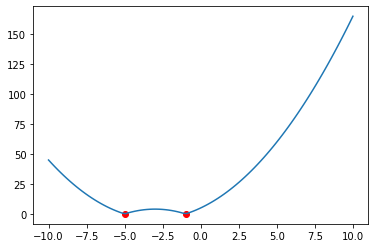

In [41]:
def min_g_graph():
    x = np.linspace(-10, 10, 100)
    y = list(map(g(a, b), x))
    plt.plot(x, y)
    plt.scatter(g_x[0], g(a, b)(g_x[0]), c="#f00")
    plt.scatter(g_x[1], g(a, b)(g_x[1]), c="#f00")

min_g_graph()

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

## Пункт 1
Шанс выпадения монетки одной стороной 10 раз для одного человека:
$$\frac{2 * \binom{10}{10}}{2^{10}} = \frac{1}{512}$$

Тогда шанс **не**выпадения монетки одной стороной 10 раз для 1000 человек:
$$\left(1 - \frac{1}{512}\right)^{1000} \approx 0.14156$$

Значит, вероятность искомого события:
$$1 - \left(1 - \frac{2 * \binom{10}{10}}{2^{10}}\right)^{1000} \approx 0.85844$$

## Пункт 2
Шанс выпадения монетки одной стороной определенной стороной (допустим орлом) 8 раз из 8 бросков для одного человека:
$$\frac{\binom{8}{8}}{2^{8}} = \frac{1}{256}$$

Шанс выпадения монетки одной стороной 8 раз из 10 бросков для одного человека:
$$2 * \frac{1}{256} * \binom{3}{1} = \frac{3}{127}$$

Тогда вероятность искомого события:
$$1 - (1 - \frac{3}{127})^{1000} \approx 0.99999999996$$

## Пункт 3
Шанс выпадения монетки одной стороной 10 раз для одного человека:
$$\frac{2 * \binom{10}{10}}{2^{10}} = \frac{1}{512}$$

Тогда вероятность выпадения монетки одной стороной ровно у трех человек находится по формуле Бернулли:
$$\binom{1000}{3} * \left(\frac{1}{512}\right)^{3} * \left(1 - \frac{1}{512}\right)^{1000 - 3} \approx 0.17629$$